# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Plot and interpret density plots and comment on the shape of the plot
* Estimate probabilities for continuous variables by using interpolation 


## Let's get started

Let's import the necessary libraries for this lab.

In [13]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like `loc()`, `iloc()`, and `groupby()`

In [15]:
data = pd.read_csv('weight-height.csv')
df = pd.DataFrame(data)
df.head()
male_df =  df.loc[df['Gender'] == 'Male']
female_df =  df.loc[df['Gender'] == 'Female']

display(male_df.describe(), female_df.describe())
# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

,Height,Weight
count,5000.000000,5000.000000
mean,69.026346,187.020621
std,2.863362,19.781155
min,58.406905,112.902939
25%,67.174679,173.887767
50%,69.027709,187.033546
75%,70.988744,200.357802
max,78.998742,269.989699


,Height,Weight
count,5000.000000,5000.000000
mean,63.708774,135.860093
std,2.696284,19.022468
min,54.263133,64.700127
25%,61.894441,122.934096
50%,63.730924,136.117583
75%,65.563565,148.810926
max,73.389586,202.237214


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- Use binsize = 10, set alpha level so that overlap can be visualized

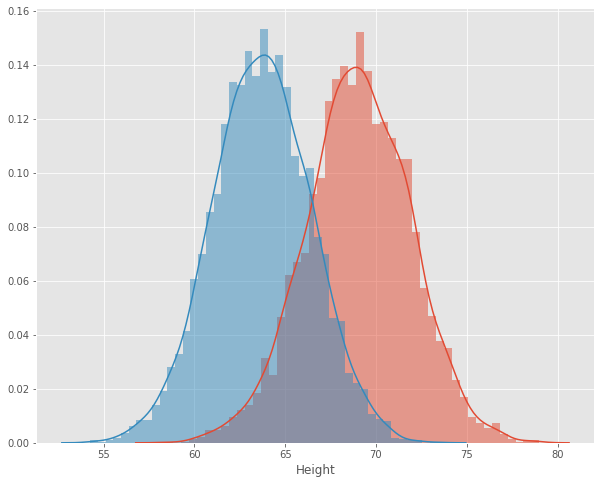

In [24]:
plt.subplots(1, sharex=True, figsize = (10,8) )
ax  = sns.distplot(male_df.Height, hist = True, hist_kws = {'alpha': .5})
ax1 = sns.distplot(female_df.Height, hist = True, hist_kws = {'alpha':.5})

In [18]:
# Record your observations - are these inline with your personal observations?


## Create a density function using interpolation


- Write a density function density() that uses interpolation and takes in a random variable
- Use `np.histogram()`
- The function should return two lists carrying x and y coordinates for plotting the density function

[0.18901951058705282, 0.18901951058705282, 0.7560780423482117, 1.5121560846964226, 5.103526785850427, 4.158429232915164, 3.0243121693928443, 2.2682341270446353, 1.1341170635223177, 0.567058531761158]


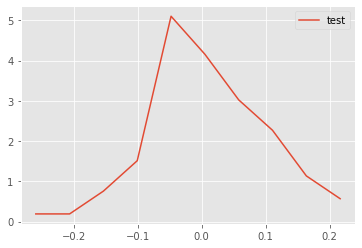

In [36]:
def density(x):
    n,bins = np.histogram(x, bins = 10, density = True)
    middle_x = []
    middle_y = []
    for i in range(len(bins)-1):
        mid_x =(bins[i]+bins[i+1])/2
        middle_x.append(mid_x)
        mid_y = n[i]
        middle_y.append(mid_y)
    return middle_y, middle_x
        
        
    


# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
y,x = density(s)
print(y)
plt.plot(x,y, label = 'test')
plt.legend()

## Add overlapping density plots to the histograms plotted earlier

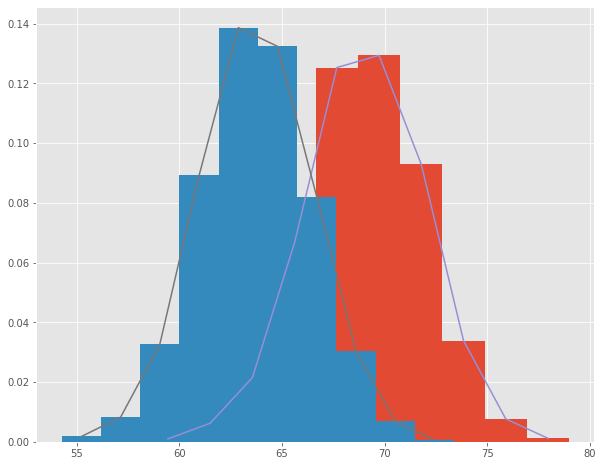

In [54]:
plt.subplots(1, sharex=True, figsize = (10,8) )
ax  = plt.hist(male_df.Height, density = True)
ax1 = plt.hist(female_df.Height,  density = True)
x1,y1 = density(male_df.Height)
plt.plot(y1,x1)
x2,y2 = density(female_df.Height)
plt.plot(y2,x2)
plt.show()

## Repeat the above exercise for male and female weights

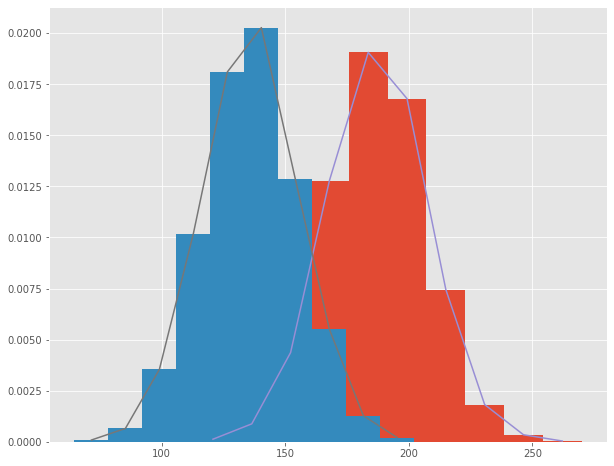

In [55]:
plt.subplots(1, sharex=True, figsize = (10,8) )
ax  = plt.hist(male_df.Weight, density = True)
ax1 = plt.hist(female_df.Weight,  density = True)
x1,y1 = density(male_df.Weight)
plt.plot(y1,x1)
x2,y2 = density(female_df.Weight)
plt.plot(y2,x2)
plt.show()

## Write your observations in the cell below

In [25]:
# Record your observations - are these inline with your personal observations?


# What is the takeaway when comparing male and female heights and weights?

## Repeat the above experiments in seaborn and compare with your results

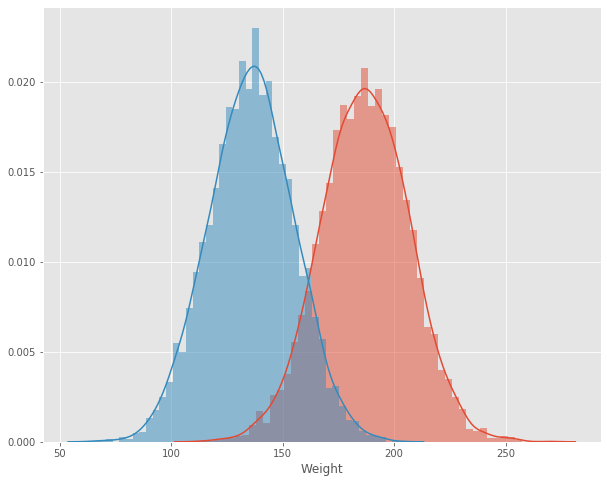

In [37]:
plt.subplots(1, sharex=True, figsize = (10,8) )
ax  = sns.distplot(male_df.Weight, hist = True, hist_kws = {'alpha': .5})
ax1 = sns.distplot(female_df.Weight, hist = True, hist_kws = {'alpha':.5})

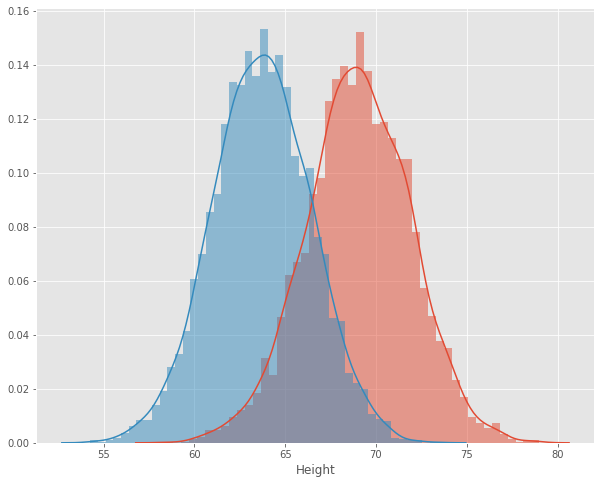

In [56]:
plt.subplots(1, sharex=True, figsize = (10,8) )
ax  = sns.distplot(male_df.Height, hist = True, hist_kws = {'alpha': .5})
ax1 = sns.distplot(female_df.Height, hist = True, hist_kws = {'alpha':.5})

In [57]:
# Your comments on the two approaches here. 
# are they similar? what makes them different if they are?
# Seaborn is infinately easier in everyway shape and form

## Summary

In this lesson, you learned how to build the probability density curves visually for a given dataset and compare the distributions visually by looking at the spread, center, and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.